In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
path = '/content/drive/MyDrive/banknote-authentication_csv.csv'
bank = pd.read_csv(path)

In [36]:
bank.columns=['variance','skewness','curtosis','entropy','class']

In [37]:
bank

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


In [9]:
s = bank.values[:,0:4]

In [10]:
s

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [11]:
scr = StandardScaler()

In [12]:
x = scr.fit_transform(s)

In [13]:
x

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

In [17]:
y = bank.values[:,4]

In [18]:
y

array([1., 1., 1., ..., 2., 2., 2.])

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.2)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1097, 4)
(1097,)
(275, 4)
(275,)


In [21]:
from sklearn.naive_bayes import GaussianNB # importation
Gmodel=GaussianNB()

In [22]:
Gmodel.fit(xtrain,ytrain)
train_Gpred=Gmodel.predict(xtrain) #
test_Gpred=Gmodel.predict(xtest) #

In [23]:
train_acc_gau=np.mean(train_Gpred==ytrain)# 120 samples label(train)
test_acc_gau=np.mean(test_Gpred==ytest)# 30 samples label(test)
print('gaussian naive bayes - training accuracy:',train_acc_gau)
print('gaussian nb - testing time accuracy:',test_acc_gau)

gaussian naive bayes - training accuracy: 0.8422971741112124
gaussian nb - testing time accuracy: 0.8254545454545454


In [38]:
scores=test_acc_gau*100
print('THE ACCURACY SCORE FOR BANK NOTE AUNTHENTICATION DATA BY GAUSSIAN NAIVE BAYES ALGORITHM IN ENTROPY METHOD IS:',scores)

THE ACCURACY SCORE FOR BANK NOTE AUNTHENTICATION DATA BY GAUSSIAN NAIVE BAYES ALGORITHM IN ENTROPY METHOD IS: 82.54545454545455


In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
xgbr = XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(verbosity=0)


In [32]:
xgbr.fit(xtrain,ytrain)
score=xgbr.score(xtrain,ytrain)
print('training score is:',score)

training score is: 0.9858771263126883


In [33]:
cv_score = cross_val_score(xgbr,xtrain,ytrain,cv=10)
print('cv mean score is:',cv_score.mean())

cv mean score is: 0.9597081483153203


In [34]:
ypred=xgbr.predict(xtest)
mse=mean_squared_error(ytest,ypred)
print('MSE is:',mse)
print('rmse is:',mse*(1/2.0))

MSE is: 0.008200249735997483
rmse is: 0.004100124867998742


In [40]:
scores=cv_score.mean()*100 
print('THE ACCURACY SCORE FOR BANK NOTE AUNTHENTICATION DATA BY EXTREME GRADIENT BOOSTING ALGORITHM IN ENTROPY METHOD IS:',scores)

THE ACCURACY SCORE FOR BANK NOTE AUNTHENTICATION DATA BY EXTREME GRADIENT BOOSTING ALGORITHM IN ENTROPY METHOD IS: 95.97081483153202


In [41]:
a = pd.Series([ 'GAUSSIAN NAIVE BAYES ALGORITHM' ,'EXTREME GRADIENT BOOSTING ALGORITHM'])

In [42]:
b = np.array([82.54545454545455,95.97081483153202])

In [43]:
c ={'ALGORITHMS':a,'ACCURACY SCORES':b}

In [44]:
d = pd.DataFrame(c)

In [45]:
d

,ALGORITHMS,ACCURACY SCORES
0,GAUSSIAN NAIVE BAYES ALGORITHM,82.545455
1,EXTREME GRADIENT BOOSTING ALGORITHM,95.970815


[Text(0, 0, 'GAUSSIAN NAIVE BAYES ALGORITHM'),
 Text(0, 0, 'EXTREME GRADIENT BOOSTING ALGORITHM')]

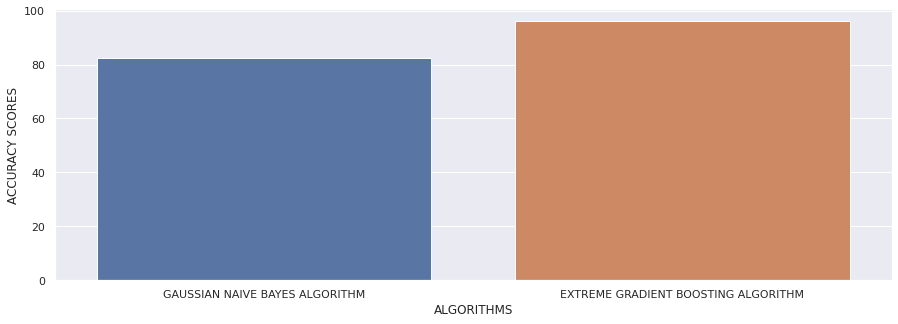

In [46]:
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(x='ALGORITHMS',y='ACCURACY SCORES',data=d)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0)